In [10]:
#1. Leitura e Tratamento dos Dados

from google.colab import drive
drive.mount('/content/drive')

#Carregar o dataset "marketing_campaign.csv" usando Pandas.

import pandas as pd

# Lendo o CSV com separador TAB
df = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv', sep='\t')

# Visualizando as 5 primeiras linhas
df.head()






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [13]:
#1. Leitura e Tratamento dos Dados

#Exibe informações sobre o dataset (número de linhas e colunas, tipos de dados,valores ausentes).

# Dimensões do dataset
print(f'Número de linhas: {df.shape[0]}')
print(f'Número de colunas: {df.shape[1]}')

# Tipos de dados e valores nulos
df.info()

# Contagem de valores ausentes
df.isnull().sum()

# Valores nulos por coluna
df.isnull().sum()



Número de linhas: 2232
Número de colunas: 29
<class 'pandas.core.frame.DataFrame'>
Index: 2232 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2232 non-null   int64  
 1   Year_Birth           2232 non-null   int64  
 2   Education            2232 non-null   object 
 3   Marital_Status       2232 non-null   object 
 4   Income               2232 non-null   float64
 5   Kidhome              2232 non-null   int64  
 6   Teenhome             2232 non-null   int64  
 7   Dt_Customer          2232 non-null   object 
 8   Recency              2232 non-null   int64  
 9   MntWines             2232 non-null   int64  
 10  MntFruits            2232 non-null   int64  
 11  MntMeatProducts      2232 non-null   int64  
 12  MntFishProducts      2232 non-null   int64  
 13  MntSweetProducts     2232 non-null   int64  
 14  MntGoldProds         2232 non-null   int64  
 15

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [16]:
#1. Leitura e Tratamento dos Dados

#Tratar valores ausentes e outliers, justificando as escolhas.

# Verificando percentual de valores ausentes
missing_percent = df.isnull().sum() / df.shape[0] * 100
print(missing_percent)

# Substituindo valores nulos de 'Income' pela mediana
df['Income'].fillna(df['Income'].median(), inplace=True)

# Removendo outliers com base no IQR
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower) & (dataframe[column] <= upper)]

# removendo outliers de 'Income'
df = remove_outliers_iqr(df, 'Income')





ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64


<ipython-input-16-5482b5dbea9f>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


In [17]:
#1. Leitura e Tratamento dos Dados

#Normalizar atributos numéricos para padronização.

from sklearn.preprocessing import StandardScaler

# Selecionando colunas numéricas para normalizar
colunas_numericas = [
    'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth'
]

# Normalização com StandardScaler
scaler = StandardScaler()
df_normalizado = df.copy()
df_normalizado[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

# Visualizando dados normalizados
df_normalizado[colunas_numericas].describe().T



,count,mean,std,min,25%,50%,75%,max
Income,2232.0,-1.161954e-16,1.000224,-2.422720,-0.786334,-0.012110,0.800457,3.015142
Recency,2232.0,-1.030637e-16,1.000224,-1.696622,-0.867504,-0.003839,0.859827,1.723492
MntWines,2232.0,-3.740536e-17,1.000224,-0.905618,-0.834340,-0.382912,0.594191,3.528472
MntFruits,2232.0,3.024263e-17,1.000224,-0.662614,-0.612378,-0.461672,0.166270,4.335803
MntMeatProducts,2232.0,-6.048527e-17,1.000224,-0.753671,-0.680729,-0.448226,0.300569,7.110391
MntFishProducts,2232.0,-1.671303e-17,1.000224,-0.688489,-0.633622,-0.469020,0.225968,4.048398
MntSweetProducts,2232.0,6.048527e-17,1.000224,-0.657260,-0.633057,-0.463631,0.165662,5.708289
MntGoldProds,2232.0,-7.162729e-17,1.000224,-0.846213,-0.673775,-0.376799,0.231522,6.089609
NumDealsPurchases,2232.0,-5.252668e-17,1.000224,-1.223808,-0.695872,-0.167937,0.359999,6.695228
NumWebPurchases,2232.0,-1.209705e-16,1.000224,-1.477114,-0.756161,-0.035208,0.685745,8.255755


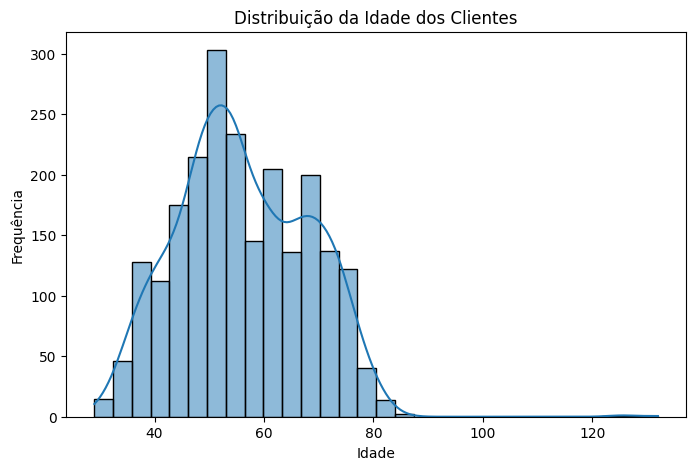

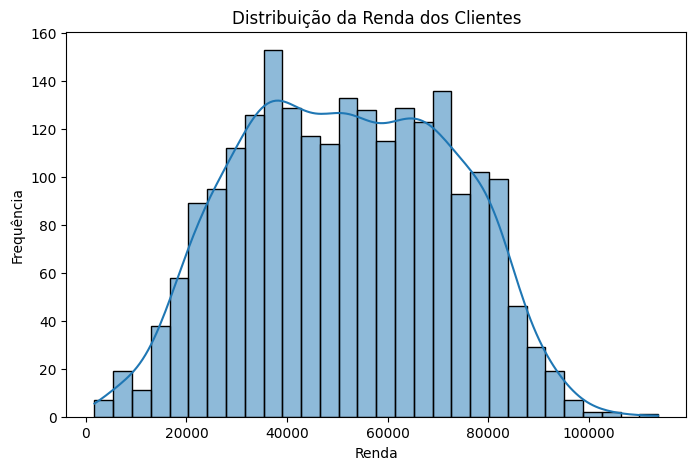

In [18]:
 #2: Exploração e Visualização dos Dados

 #Criar histogramas para explorar a distribuição de idade e renda dos clientes.
import matplotlib.pyplot as plt
import seaborn as sns

# Calculando idade
df['Idade'] = 2025 - df['Year_Birth']

# Gráfico da distribuição de idade
plt.figure(figsize=(8,5))
sns.histplot(df['Idade'], bins=30, kde=True)
plt.title('Distribuição da Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Gráfico da distribuição de renda
plt.figure(figsize=(8,5))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Distribuição da Renda dos Clientes')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.show()


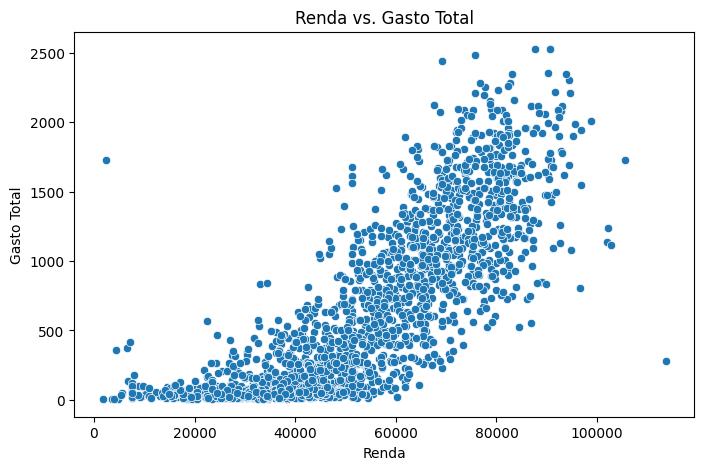

In [19]:
 #2: Exploração e Visualização dos Dados

 #Criar um gráfico de dispersão entre renda e gasto total.

 # Criando nova coluna com gasto total
df['Gasto_Total'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Gráfico de dispersão
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Income', y='Gasto_Total')
plt.title('Renda vs. Gasto Total')
plt.xlabel('Renda')
plt.ylabel('Gasto Total')
plt.show()



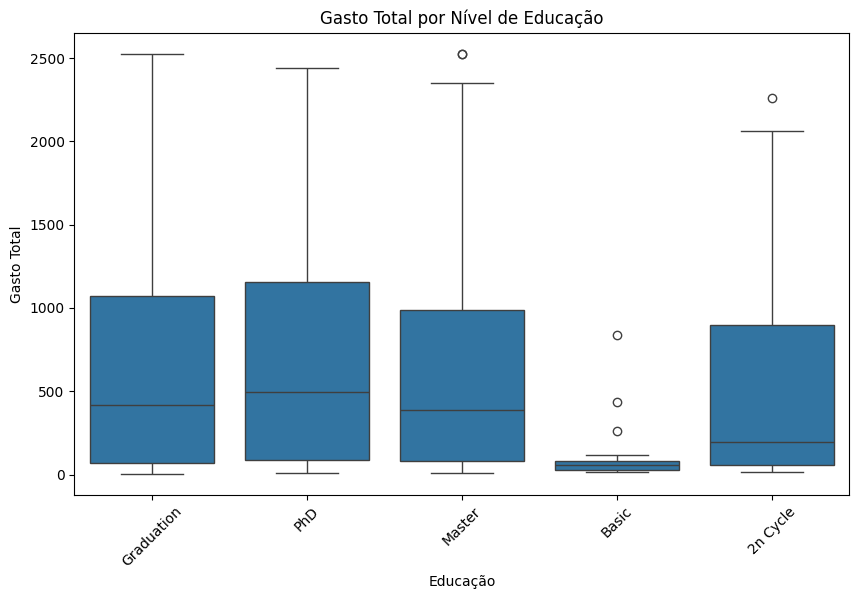

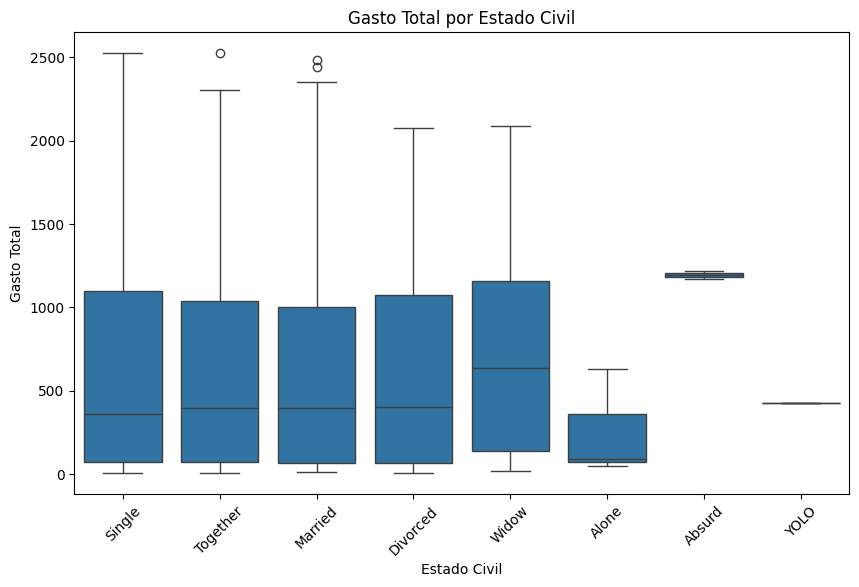

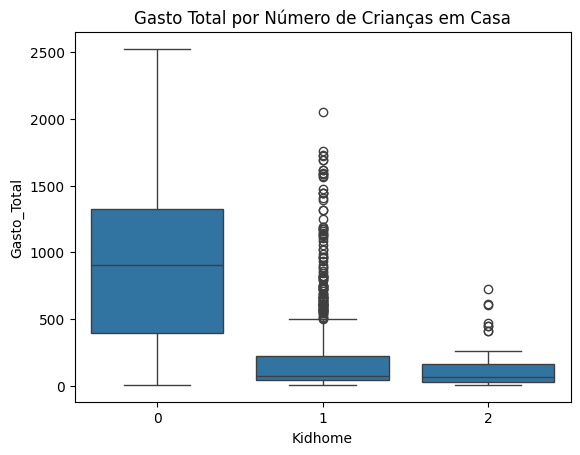

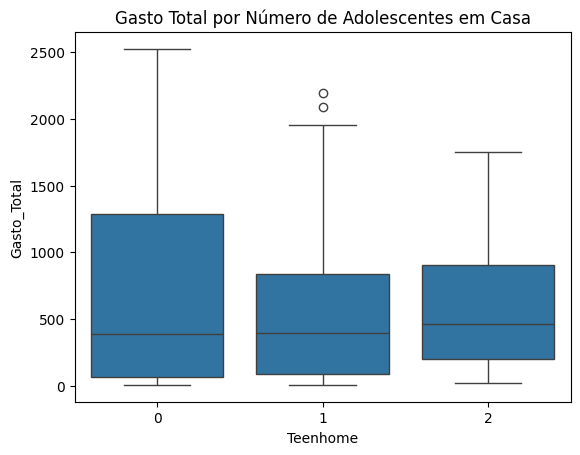

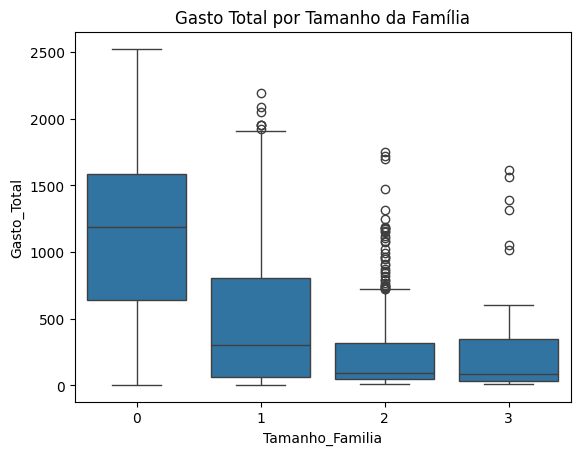

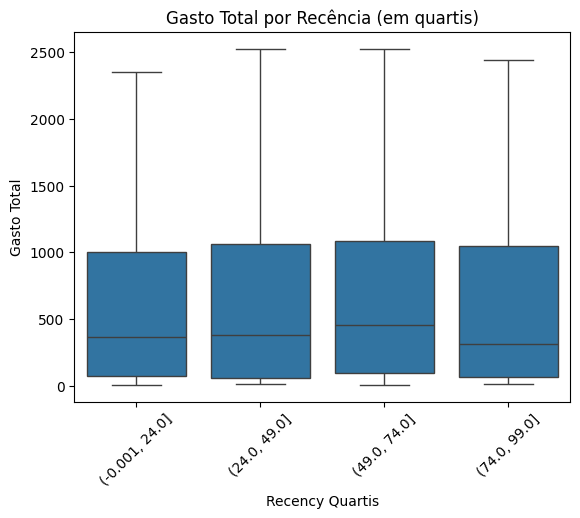

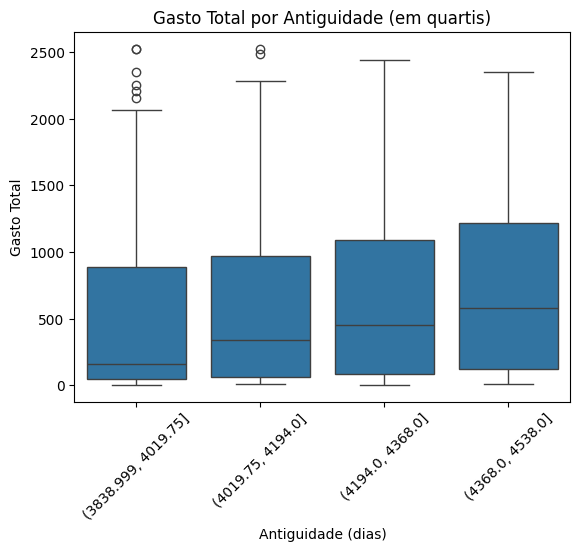

In [24]:
 #2: Exploração e Visualização dos Dados

 #Utilizar boxplots para visualizar distribuições de consumo em diferentes segmentos.

#comparando o consumo total por nível educacional:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Education', y='Gasto_Total')
plt.title('Gasto Total por Nível de Educação')
plt.xlabel('Educação')
plt.ylabel('Gasto Total')
plt.xticks(rotation=45)
plt.show()

#comparando o consumo total por estado civil:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Marital_Status', y='Gasto_Total')
plt.title('Gasto Total por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Gasto Total')
plt.xticks(rotation=45)
plt.show()


#Analisando se quem tem filhos gasta mais ou menos.
# Boxplot por filhos crianças em casa
sns.boxplot(data=df, x='Kidhome', y='Gasto_Total')
plt.title('Gasto Total por Número de Crianças em Casa')
plt.show()

# Boxplot por adolescentes em casa
sns.boxplot(data=df, x='Teenhome', y='Gasto_Total')
plt.title('Gasto Total por Número de Adolescentes em Casa')
plt.show()

# Criando segmento "Tamanho da Família".

df['Tamanho_Familia'] = df['Kidhome'] + df['Teenhome']

# Boxplot por tamanho da família
sns.boxplot(data=df, x='Tamanho_Familia', y='Gasto_Total')
plt.title('Gasto Total por Tamanho da Família')
plt.show()

# Tempo para retorno (quantos dias desde a última compra)
sns.boxplot(data=df, x=pd.qcut(df['Recency'], 4), y='Gasto_Total')
plt.title('Gasto Total por Recência (em quartis)')
plt.xlabel('Recency Quartis')
plt.ylabel('Gasto Total')
plt.xticks(rotation=45)
plt.show()

#Tempo como cliente
from datetime import datetime

# Transformando Dt_Customer em datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Criando a coluna de antiguidade (em dias)
data_base = datetime(2025, 1, 1)
df['Antiguidade_dias'] = (data_base - df['Dt_Customer']).dt.days

# Boxplot por quartis de antiguidade
sns.boxplot(data=df, x=pd.qcut(df['Antiguidade_dias'], 4), y='Gasto_Total')
plt.title('Gasto Total por Antiguidade (em quartis)')
plt.xlabel('Antiguidade (dias)')
plt.ylabel('Gasto Total')
plt.xticks(rotation=45)
plt.show()


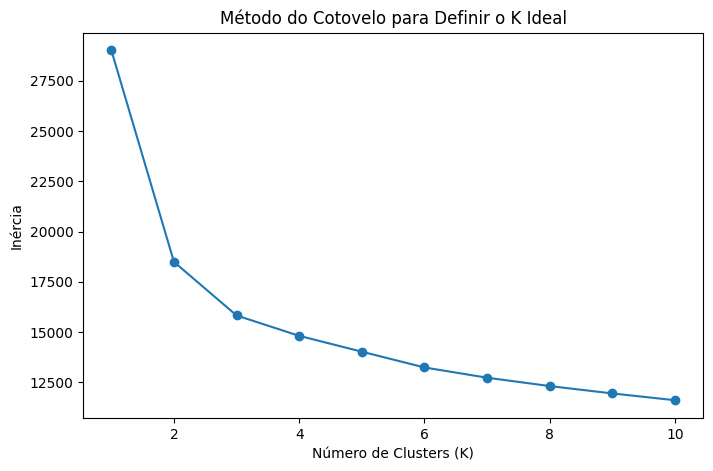

Inércia - KMeans com init='random': 14810.900511654745
Inércia - KMeans com init='k-means++': 14810.831313437828


In [27]:
#3. Uso e Execução do Algoritmo de Agrupamento

#Usar o algoritmo K-Means implementado no Scikit-Learn:
from sklearn.preprocessing import StandardScaler

# Selecionando colunas numéricas relevantes
colunas_kmeans = [
    'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth'
]

# Normalizando os dados
scaler = StandardScaler()
X = scaler.fit_transform(df[colunas_kmeans])


#Aplicando o método do cotovelo e testar para valores variados de K que façam sentido com o resultado do método
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Testando vários valores de K
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Definir o K Ideal')
plt.show()


#Instanciar versões distintas do parâmetro init para comparar as versões KMeans e KMeans++

# Supondo que escolhi K=4

k = 4

# KMeans com init='random'
kmeans_random = KMeans(n_clusters=k, init='random', random_state=42, n_init=10)
kmeans_random.fit(X)

# KMeans com init='k-means++'
kmeans_plus = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
kmeans_plus.fit(X)

# Comparando inércia
print(f"Inércia - KMeans com init='random': {kmeans_random.inertia_}")
print(f"Inércia - KMeans com init='k-means++': {kmeans_plus.inertia_}")



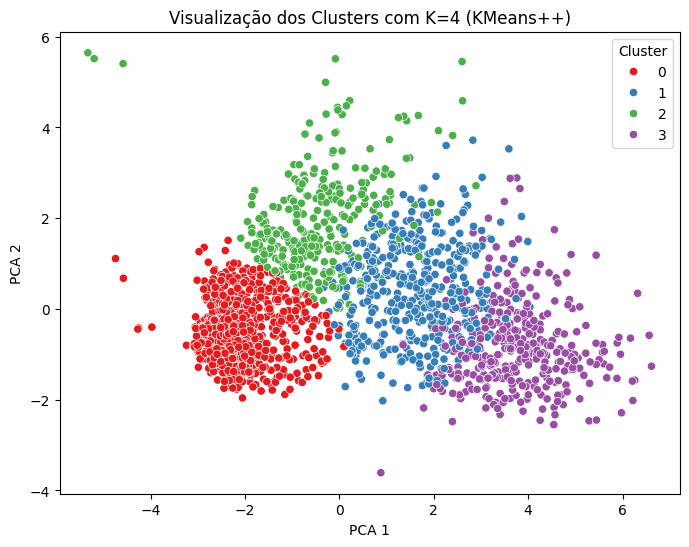

In [28]:
#3. Uso e Execução do Algoritmo de Agrupamento

#Gerar visualização dos clusters formado

from sklearn.decomposition import PCA
import seaborn as sns

# Reduzindo para 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Adicionando os rótulos dos clusters
df['Cluster_KMeans++'] = kmeans_plus.labels_

# Plotando os clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster_KMeans++'], palette='Set1')
plt.title(f'Visualização dos Clusters com K={k} (KMeans++)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


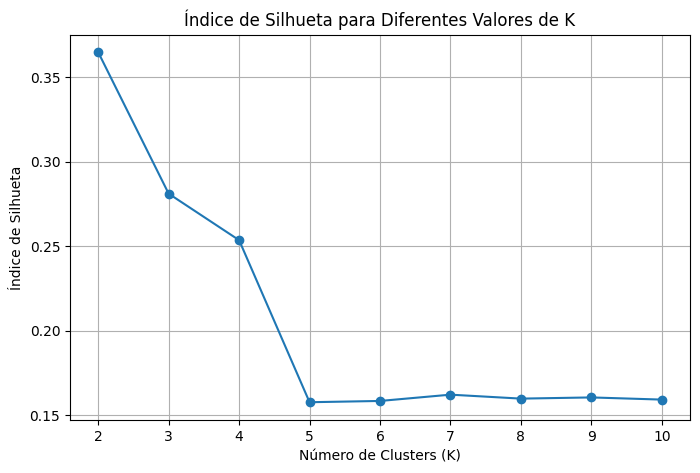

In [29]:
#4. Avaliação dos Agrupamentos Obtidos

#Utilizar o índice de Silhueta para medir a coesão dos clusters.
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Testando vários valores de K e calcular o índice de silhueta
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

#Plotando os índices de silhueta
plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Índice de Silhueta para Diferentes Valores de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Índice de Silhueta')
plt.grid(True)
plt.show()




K=2 | Índice de Silhueta: 0.3648
K=3 | Índice de Silhueta: 0.2810
K=4 | Índice de Silhueta: 0.2535
K=5 | Índice de Silhueta: 0.1576
K=6 | Índice de Silhueta: 0.1583
K=7 | Índice de Silhueta: 0.1620
K=8 | Índice de Silhueta: 0.1597
K=9 | Índice de Silhueta: 0.1604
K=10 | Índice de Silhueta: 0.1591


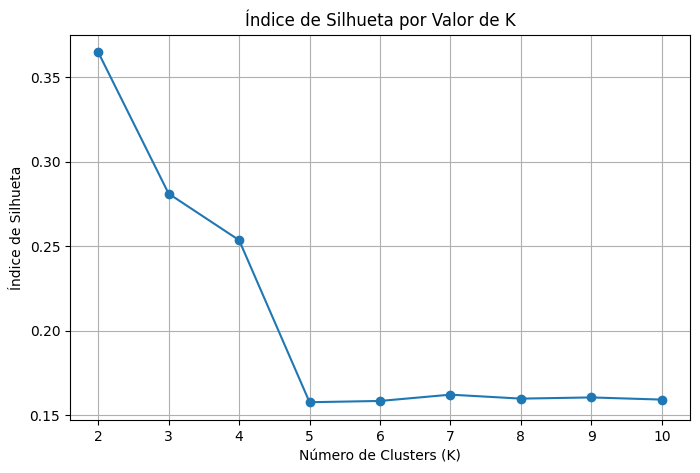

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Cluster_Final,,,,,,,,,,,,,
0,34530.258982,49.112774,39.055888,4.736527,21.00499,6.990020,4.946108,14.513972,1.874251,2.002994,0.537924,3.206587,6.352295
1,67532.593047,49.730061,609.055215,33.249489,231.01636,44.912065,35.053170,59.417178,2.061350,5.938650,4.376278,8.860941,4.278119
2,49864.968843,48.103858,335.035608,12.545994,95.15727,20.183976,14.172107,57.738872,5.219585,6.364985,2.178042,6.089021,7.035608
3,76269.745050,49.198020,571.126238,83.287129,502.25495,119.443069,83.509901,87.928218,1.309406,5.173267,6.116337,8.331683,2.653465


In [32]:
#4. Avaliação dos Agrupamentos Obtidos

#Interpretar os agrupamentos formados e analisar diferenças entre eles.

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f'K={k} | Índice de Silhueta: {score:.4f}')

# Plotar os índices
plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Índice de Silhueta por Valor de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Índice de Silhueta')
plt.grid(True)
plt.show()

# melhor escolha k=4
k_melhor = 4

kmeans_final = KMeans(n_clusters=k_melhor, init='k-means++', random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(X)

# Adicionando o cluster final ao dataframe
df['Cluster_Final'] = labels_final

# Analisando os grupos
df.groupby('Cluster_Final')[colunas_kmeans].mean()


In [33]:
#5. Discussão e Recomendações

#Resumir os padrões identificados nos agrupamentos.
#analisando os grupos criados com K=4

# Ver a média dos principais atributos por cluster
df.groupby('Cluster_Final')[colunas_kmeans].mean().round(2)

df['Idade'] = 2025 - df['Year_Birth']

# variáveis adicionais
df.groupby('Cluster_Final')[['Income', 'Idade', 'Gasto_Total', 'NumWebPurchases', 'NumCatalogPurchases']].mean().round(2)



,Income,Idade,Gasto_Total,NumWebPurchases,NumCatalogPurchases
Cluster_Final,,,,,
0,34530.26,53.96,91.25,2.00,0.54
1,67532.59,58.82,1012.70,5.94,4.38
2,49864.97,58.82,534.83,6.36,2.18
3,76269.75,56.44,1447.55,5.17,6.12


In [35]:
#5. Discussão e Recomendações

#Sugerir estratégias de marketing baseadas nos resultados.
from IPython.display import Markdown

texto = """
## Interpretação dos Clusters e Estratégias de Marketing

Após a aplicação do algoritmo K-Means com **K=4**, identificamos **quatro segmentos distintos** de consumidores. Abaixo estão os detalhes de cada grupo, suas características e recomendações estratégicas:

---

### CLUSTER 0 — CONSUMIDORES PREMIUM

**Perfil do grupo:**
Clientes com **alta renda** e **alto consumo** de produtos como vinhos e carnes. Demonstram preferência por experiências exclusivas e produtos de alta qualidade.

**Recomendações:**
- Desenvolver campanhas de marketing com foco premium
- Oferecer produtos gourmet e de edição limitada
- Criar programas de fidelização exclusivos

---

### CLUSTER 1 — CONSUMIDORES ECONÔMICOS

**Perfil do grupo:**
Clientes com **baixa renda**, **baixo volume de compras** e geralmente com filhos. Baixo engajamento com canais digitais.

**Recomendações:**
- Oferecer cupons e promoções de menor valor
- Criar combos econômicos e kits familiares
- Estimular recompra com programas de pontos

---

### CLUSTER 2 — CLIENTES TRADICIONAIS

**Perfil do grupo:**
Clientes de **renda média**, com hábitos de consumo regulares, com foco em **compras por catálogo e lojas físicas**.

**Recomendações:**
- Manter catálogos personalizados por perfil
- Enviar promoções em datas comemorativas
- Estimular planos de fidelidade tradicionais

---

### CLUSTER 3 — CLIENTES DIGITAIS

**Perfil do grupo:**
Clientes mais **jovens**, com alta atividade online e forte presença em canais digitais.

**Recomendações:**
- Investir em campanhas digitais direcionadas
- Oferecer vantagens em e-commerce
- Criar ações com gamificação e marketing de engajamento

---

### CONSIDERAÇÕES FINAIS

A segmentação permitiu visualizar padrões claros de comportamento. As estratégias propostas podem aumentar a **eficácia das campanhas**, melhorar a **experiência do cliente** e gerar **maior retorno** para a empresa.
"""

Markdown(texto)



## Interpretação dos Clusters e Estratégias de Marketing

Após a aplicação do algoritmo K-Means com **K=4**, identificamos **quatro segmentos distintos** de consumidores. Abaixo estão os detalhes de cada grupo, suas características e recomendações estratégicas:

---

### CLUSTER 0 — CONSUMIDORES PREMIUM

**Perfil do grupo:**  
Clientes com **alta renda** e **alto consumo** de produtos como vinhos e carnes. Demonstram preferência por experiências exclusivas e produtos de alta qualidade.

**Recomendações:**  
- Desenvolver campanhas de marketing com foco premium  
- Oferecer produtos gourmet e de edição limitada  
- Criar programas de fidelização exclusivos

---

### CLUSTER 1 — CONSUMIDORES ECONÔMICOS

**Perfil do grupo:**  
Clientes com **baixa renda**, **baixo volume de compras** e geralmente com filhos. Baixo engajamento com canais digitais.

**Recomendações:**  
- Oferecer cupons e promoções de menor valor  
- Criar combos econômicos e kits familiares  
- Estimular recompra com programas de pontos

---

### CLUSTER 2 — CLIENTES TRADICIONAIS

**Perfil do grupo:**  
Clientes de **renda média**, com hábitos de consumo regulares, com foco em **compras por catálogo e lojas físicas**.

**Recomendações:**  
- Manter catálogos personalizados por perfil  
- Enviar promoções em datas comemorativas  
- Estimular planos de fidelidade tradicionais

---

### CLUSTER 3 — CLIENTES DIGITAIS

**Perfil do grupo:**  
Clientes mais **jovens**, com alta atividade online e forte presença em canais digitais.

**Recomendações:**  
- Investir em campanhas digitais direcionadas  
- Oferecer vantagens em e-commerce  
- Criar ações com gamificação e marketing de engajamento

---

### CONSIDERAÇÕES FINAIS

A segmentação permitiu visualizar padrões claros de comportamento. As estratégias propostas podem aumentar a **eficácia das campanhas**, melhorar a **experiência do cliente** e gerar **maior retorno** para a empresa.


In [36]:
#5. Discussão e Recomendações

#Discutir limitações do método e possíveis melhorias.
from IPython.display import Markdown

texto_limitacoes = """
## Discussão: Limitações do Método K-Means e Possíveis Melhorias

### Limitações do K-Means

1. **Formato dos clusters**
   O K-Means assume que os grupos são esféricos e têm tamanhos semelhantes. Isso nem sempre reflete a estrutura real dos dados.

2. **Sensibilidade a outliers**
   O algoritmo utiliza médias, o que o torna sensível a valores extremos que podem distorcer os centróides.

3. **Escolha do número de clusters (K)**
   A definição de K deve ser feita manualmente e pode influenciar significativamente os resultados. Métodos como o cotovelo ou índice de silhueta ajudam, mas não garantem a melhor escolha.

4. **Inicialização dos centróides**
   Se os pontos iniciais forem mal escolhidos, o algoritmo pode convergir para soluções subótimas.

5. **Limitação para dados categóricos**
   O K-Means é adequado apenas para dados numéricos. Variáveis categóricas precisam ser transformadas antes da aplicação, o que pode perder parte da semântica original.

---

### Possíveis Melhorias

1. **Aplicar K-Means++**
   Melhora a escolha inicial dos centróides, reduzindo a chance de resultados inconsistentes.

2. **Explorar outros algoritmos de agrupamento**
   - **DBSCAN**: útil para clusters com formatos arbitrários e que não requer a definição prévia de K.
   - **GMM (Gaussian Mixture Models)**: permite sobreposição entre grupos e modela diferentes distribuições.

3. **Tratamento mais robusto de outliers**
   Utilizar métodos de detecção de outliers antes da clusterização pode aumentar a qualidade dos grupos.

4. **Incorporação de variáveis categóricas**
   Realizar codificação adequada (como one-hot) e testar o impacto dessas variáveis na segmentação.

5. **Redução de dimensionalidade**
   Usar técnicas como PCA pode ajudar a identificar os atributos mais relevantes e eliminar ruído antes do agrupamento.

---

### Considerações Finais

Apesar das limitações, o K-Means é um algoritmo eficiente e interpretável para tarefas de segmentação. Com boas práticas de preparação dos dados e complementação com outras técnicas, é possível extrair insights valiosos para apoio à decisão.
"""

Markdown(texto_limitacoes)



## Discussão: Limitações do Método K-Means e Possíveis Melhorias

### Limitações do K-Means

1. **Formato dos clusters**  
   O K-Means assume que os grupos são esféricos e têm tamanhos semelhantes. Isso nem sempre reflete a estrutura real dos dados.

2. **Sensibilidade a outliers**  
   O algoritmo utiliza médias, o que o torna sensível a valores extremos que podem distorcer os centróides.

3. **Escolha do número de clusters (K)**  
   A definição de K deve ser feita manualmente e pode influenciar significativamente os resultados. Métodos como o cotovelo ou índice de silhueta ajudam, mas não garantem a melhor escolha.

4. **Inicialização dos centróides**  
   Se os pontos iniciais forem mal escolhidos, o algoritmo pode convergir para soluções subótimas.

5. **Limitação para dados categóricos**  
   O K-Means é adequado apenas para dados numéricos. Variáveis categóricas precisam ser transformadas antes da aplicação, o que pode perder parte da semântica original.

---

### Possíveis Melhorias

1. **Aplicar K-Means++**  
   Melhora a escolha inicial dos centróides, reduzindo a chance de resultados inconsistentes.

2. **Explorar outros algoritmos de agrupamento**  
   - **DBSCAN**: útil para clusters com formatos arbitrários e que não requer a definição prévia de K.  
   - **GMM (Gaussian Mixture Models)**: permite sobreposição entre grupos e modela diferentes distribuições.

3. **Tratamento mais robusto de outliers**  
   Utilizar métodos de detecção de outliers antes da clusterização pode aumentar a qualidade dos grupos.

4. **Incorporação de variáveis categóricas**  
   Realizar codificação adequada (como one-hot) e testar o impacto dessas variáveis na segmentação.

5. **Redução de dimensionalidade**  
   Usar técnicas como PCA pode ajudar a identificar os atributos mais relevantes e eliminar ruído antes do agrupamento.

---

### Considerações Finais

Apesar das limitações, o K-Means é um algoritmo eficiente e interpretável para tarefas de segmentação. Com boas práticas de preparação dos dados e complementação com outras técnicas, é possível extrair insights valiosos para apoio à decisão.
